<a href="https://colab.research.google.com/github/cantonioupao/3d-virtual-chatbot/blob/main/vid2vid_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Few shot vid2vid - Inference
**Author**: [Christos Antoniou](https://github.com/cantonioupao)


This notebook provides an inference example of the [fs_vid2vid](https://github.com/NVlabs/imaginaire/blob/master/projects/fs_vid2vid/README.md) model, which is
compiled under the [NVIDIA Imaginaire library](https://github.com/NVlabs/imaginaire)

## Set Cuda and Pytorch version

In [1]:
### Check CUDA version
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [2]:
## Check Pytorch version and Cuda Compatibility
import torch
print(torch.__version__) ### preinstalled with most recent pytorch version

1.10.0+cu111


### Install compatible Pytorch version

In [3]:
### Install compatible torch version 
#!pip install torch==1.9.1  # --> installs 1.9.1+cu102

### Install existing CUDA installations

In [4]:
### Check available cuda version and set version
#%cd /usr/local/
#!pwd
#!ls
#!rm -rf cuda
#!ln -s /usr/local/cuda-11.1 /usr/local/cuda

### Or install your own

In [5]:
### Or install your own ( from Ubuntu, deb local)
'''
!wget https://developer.download.nvidia.com/compute/cuda/10.2/Prod/local_installers/cuda-repo-ubuntu1804-10-2-local-10.2.89-440.33.01_1.0-1_amd64.deb
!dpkg -i cuda-repo-ubuntu1804-10-2-local-10.2.89-440.33.01_1.0-1_amd64.deb
!apt-key add /var/cuda-repo-10-2-local-10.2.89-440.33.01/7fa2af80.pub
!apt-get update
!apt-get install cuda-10.2
'''

'\n!wget https://developer.download.nvidia.com/compute/cuda/10.2/Prod/local_installers/cuda-repo-ubuntu1804-10-2-local-10.2.89-440.33.01_1.0-1_amd64.deb\n!dpkg -i cuda-repo-ubuntu1804-10-2-local-10.2.89-440.33.01_1.0-1_amd64.deb\n!apt-key add /var/cuda-repo-10-2-local-10.2.89-440.33.01/7fa2af80.pub\n!apt-get update\n!apt-get install cuda-10.2\n'

In [6]:
'''
%cd /usr/local/
!pwd
!ls
!rm -rf cuda
!ln -s /usr/local/cuda-10.2 /usr/local/cuda
'''

'\n%cd /usr/local/\n!pwd\n!ls\n!rm -rf cuda\n!ln -s /usr/local/cuda-10.2 /usr/local/cuda\n'

### Check symbolic link and version

In [7]:
### Check symbolic link
!stat cuda

stat: cannot stat 'cuda': No such file or directory


In [8]:
### Check that CUDA version is changed
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


## Quick install of requirements & library 

In [9]:
%cd /content/
!git clone https://github.com/NVlabs/imaginaire

/content
Cloning into 'imaginaire'...
remote: Enumerating objects: 938, done.
remote: Counting objects: 100% (364/364), done.
remote: Compressing objects: 100% (300/300), done.
remote: Total 938 (delta 106), reused 207 (delta 47), pack-reused 574
Receiving objects: 100% (938/938), 66.08 MiB | 14.54 MiB/s, done.
Resolving deltas: 100% (261/261), done.


In [10]:
%cd /content/imaginaire
!bash scripts/install.sh

/content/imaginaire
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [82.3 kB]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:13 https://de

## Fix bug with FlowNet pretrained file

### Mount Google Drive  download the pretrained Flownet pth.tar file. 

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Download pretrained model and upload it to your local GoogleDrive
If following does not work, then try doing it manually [here]('https://docs.google.com/uc?export=download&id=1hF8vS6YeHkx3j2pfCeQqqZGwA_PJq_Da&confirm=t')

In [12]:
#!pip install pycurl (Does not work)
'''
import pycurl
file_name = '/content/imaginaire/checkpoints/flownet2.pth.tar'
file_url = 'https://docs.google.com/uc?export=download&id=1hF8vS6YeHkx3j2pfCeQqqZGwA_PJq_Da&confirm=t'
with open(file_name, 'wb') as f:
    cl = pycurl.Curl()
    cl.setopt(cl.URL, file_url)
    cl.setopt(cl.WRITEDATA, f)
    cl.perform()
    cl.close()
'''

"\nimport pycurl\nfile_name = '/content/imaginaire/checkpoints/flownet2.pth.tar'\nfile_url = 'https://docs.google.com/uc?export=download&id=1hF8vS6YeHkx3j2pfCeQqqZGwA_PJq_Da&confirm=t'\nwith open(file_name, 'wb') as f:\n    cl = pycurl.Curl()\n    cl.setopt(cl.URL, file_url)\n    cl.setopt(cl.WRITEDATA, f)\n    cl.perform()\n    cl.close()\n"

### Change flownet.py to include new path to FlowNet



Specifically, change *line 28* in **imaginaire/imaginaire/third_party/flow_net/flow_net.py** to:
```
flownet2_path = [GOOGLE_DRIVE_LOCAL_FLOWNET_PATH]
```
Make sure that the flownet pth.tar file exists already in your GoogleDrive and hardcode it, in the flownet.py file


Also to pass succesfully the tests, install the checkpoint .pt [file]() to your Google Drive and provide a local path to it. Specifically change *line 35* in **imaginaire/imaginaire/trainers/gancraft.py** 

```
f = [GOOGLE_DRIVE_LOCAL_CHECKPOINT PATH]
```




In [13]:
import torch
savepath  ='/content/drive/MyDrive/FlowNet2_checkpoint.pth.tar'
checkpoint = torch.load(savepath, map_location=torch.device('cpu'))
checkpoint_path = '/content/drive/MyDrive/demoworld-epoch_00115_iteration_000215625_checkpoint-net_G_only.pt'

#### Or just overwrite files directly

In [14]:
%%writefile /content/imaginaire/imaginaire/third_party/flow_net/flow_net.py
# Copyright (C) 2021 NVIDIA CORPORATION & AFFILIATES.  All rights reserved.
#
# This work is made available under the Nvidia Source Code License-NC.
# To view a copy of this license, check out LICENSE.md
import torch
import torch.nn as nn
import torch.nn.functional as F
import types
from imaginaire.third_party.flow_net.flownet2 import models as \
    flownet2_models
from imaginaire.third_party.flow_net.flownet2.utils import tools \
    as flownet2_tools
from imaginaire.model_utils.fs_vid2vid import resample
from imaginaire.utils.io import get_checkpoint


class FlowNet(nn.Module):
    def __init__(self, pretrained=True, fp16=False):
        super().__init__()
        flownet2_args = types.SimpleNamespace()
        setattr(flownet2_args, 'fp16', fp16)
        setattr(flownet2_args, 'rgb_max', 1.0)
        if fp16:
            print('FlowNet2 is running in fp16 mode.')
        self.flowNet = flownet2_tools.module_to_dict(flownet2_models)[
            'FlowNet2'](flownet2_args).to('cuda')
        if pretrained:
            flownet2_path ='/content/drive/MyDrive/FlowNet2_checkpoint.pth.tar'
            #flownet2_path = get_checkpoint(savepath,
            #                              '1hF8vS6YeHkx3j2pfCeQqqZGwA_PJq_Da')
            checkpoint = torch.load(flownet2_path,
                                    map_location=torch.device('cpu'))
            self.flowNet.load_state_dict(checkpoint['state_dict'])
        self.flowNet.eval()

    def forward(self, input_A, input_B):
        size = input_A.size()
        assert(len(size) == 4 or len(size) == 5 or len(size) == 6)
        if len(size) >= 5:
            if len(size) == 5:
                b, n, c, h, w = size
            else:
                b, t, n, c, h, w = size
            input_A = input_A.contiguous().view(-1, c, h, w)
            input_B = input_B.contiguous().view(-1, c, h, w)
            flow, conf = self.compute_flow_and_conf(input_A, input_B)
            if len(size) == 5:
                return flow.view(b, n, 2, h, w), conf.view(b, n, 1, h, w)
            else:
                return flow.view(b, t, n, 2, h, w), conf.view(b, t, n, 1, h, w)
        else:
            return self.compute_flow_and_conf(input_A, input_B)

    def compute_flow_and_conf(self, im1, im2):
        assert(im1.size()[1] == 3)
        assert(im1.size() == im2.size())
        old_h, old_w = im1.size()[2], im1.size()[3]
        new_h, new_w = old_h // 64 * 64, old_w // 64 * 64
        if old_h != new_h:
            im1 = F.interpolate(im1, size=(new_h, new_w), mode='bilinear',
                                align_corners=False)
            im2 = F.interpolate(im2, size=(new_h, new_w), mode='bilinear',
                                align_corners=False)
        data1 = torch.cat([im1.unsqueeze(2), im2.unsqueeze(2)], dim=2)
        with torch.no_grad():
            flow1 = self.flowNet(data1)
        # img_diff = torch.sum(abs(im1 - resample(im2, flow1)),
        #                      dim=1, keepdim=True)
        # conf = torch.clamp(1 - img_diff, 0, 1)

        conf = (self.norm(im1 - resample(im2, flow1)) < 0.02).float()

        # data2 = torch.cat([im2.unsqueeze(2), im1.unsqueeze(2)], dim=2)
        # with torch.no_grad():
        #     flow2 = self.flowNet(data2)
        # warped_flow2 = resample(flow2, flow1)
        # flow_sum = self.norm(flow1 + warped_flow2)
        # disocc = flow_sum > (0.05 * (self.norm(flow1) +
        # self.norm(warped_flow2)) + 0.5)
        # conf = 1 - disocc.float()

        if old_h != new_h:
            flow1 = F.interpolate(flow1, size=(old_h, old_w), mode='bilinear',
                                  align_corners=False) * old_h / new_h
            conf = F.interpolate(conf, size=(old_h, old_w), mode='bilinear',
                                 align_corners=False)
        return flow1, conf

    def norm(self, t):
        return torch.sum(t * t, dim=1, keepdim=True)



Overwriting /content/imaginaire/imaginaire/third_party/flow_net/flow_net.py


In [15]:
%%writefile /content/imaginaire/imaginaire/trainers/gancraft.py
#
# This work is made available under the Nvidia Source Code License-NC.
# To view a copy of this license, check out LICENSE.md
import collections
import os

import torch
import torch.nn as nn

from imaginaire.config import Config
from imaginaire.generators.spade import Generator as SPADEGenerator
from imaginaire.losses import (FeatureMatchingLoss, GaussianKLLoss, PerceptualLoss)
from imaginaire.model_utils.gancraft.loss import GANLoss
from imaginaire.trainers.base import BaseTrainer
from imaginaire.utils.distributed import master_only_print as print
from imaginaire.utils.io import get_checkpoint
from imaginaire.utils.misc import split_labels, to_device
from imaginaire.utils.trainer import ModelAverage, WrappedModel
from imaginaire.utils.visualization import tensor2label


class GauGANLoader(object):
    r"""Manages the SPADE/GauGAN model used to generate pseudo-GTs for training GANcraft.

    Args:
        gaugan_cfg (Config): SPADE configuration.
    """

    def __init__(self, gaugan_cfg):
        print('[GauGANLoader] Loading GauGAN model.')
        cfg = Config(gaugan_cfg.config)
        #default_checkpoint_path = os.path.basename(gaugan_cfg.config).split('.yaml')[0] + '-' + \
        #    cfg.pretrained_weight + '.pt'
        checkpoint = '/content/drive/MyDrive/demoworld-epoch_00115_iteration_000215625_checkpoint-net_G_only.pt'
        #checkpoint = get_checkpoint(default_checkpoint_path, cfg.pretrained_weight)
        ckpt = torch.load(checkpoint)

        net_G = WrappedModel(ModelAverage(SPADEGenerator(cfg.gen, cfg.data).to('cuda')))
        net_G.load_state_dict(ckpt['net_G'])
        self.net_GG = net_G.module.averaged_model
        self.net_GG.eval()
        self.net_GG.half()
        print('[GauGANLoader] GauGAN loading complete.')

    def eval(self, label, z=None, style_img=None):
        r"""Produce output given segmentation and other conditioning inputs.
        random style will be used if neither z nor style_img is provided.

        Args:
            label (N x C x H x W tensor): One-hot segmentation mask of shape.
            z: Style vector.
            style_img: Style image.
        """
        inputs = {'label': label[:, :-1].detach().half()}
        random_style = True

        if z is not None:
            random_style = False
            inputs['z'] = z.detach().half()
        elif style_img is not None:
            random_style = False
            inputs['images'] = style_img.detach().half()

        net_GG_output = self.net_GG(inputs, random_style=random_style)

        return net_GG_output['fake_images']


class Trainer(BaseTrainer):
    r"""Initialize GANcraft trainer.

    Args:
        cfg (Config): Global configuration.
        net_G (obj): Generator network.
        net_D (obj): Discriminator network.
        opt_G (obj): Optimizer for the generator network.
        opt_D (obj): Optimizer for the discriminator network.
        sch_G (obj): Scheduler for the generator optimizer.
        sch_D (obj): Scheduler for the discriminator optimizer.
        train_data_loader (obj): Train data loader.
        val_data_loader (obj): Validation data loader.
    """

    def __init__(self,
                 cfg,
                 net_G,
                 net_D,
                 opt_G,
                 opt_D,
                 sch_G,
                 sch_D,
                 train_data_loader,
                 val_data_loader):
        super(Trainer, self).__init__(cfg, net_G, net_D, opt_G,
                                      opt_D, sch_G, sch_D,
                                      train_data_loader, val_data_loader)

        # Load the pseudo-GT network only if in training mode, else not needed.
        if not self.is_inference:
            self.gaugan_model = GauGANLoader(cfg.trainer.gaugan_loader)

    def _init_loss(self, cfg):
        r"""Initialize loss terms.

        Args:
            cfg (obj): Global configuration.
        """
        if hasattr(cfg.trainer.loss_weight, 'gan'):
            self.criteria['GAN'] = GANLoss()
            self.weights['GAN'] = cfg.trainer.loss_weight.gan
        if hasattr(cfg.trainer.loss_weight, 'pseudo_gan'):
            self.criteria['PGAN'] = GANLoss()
            self.weights['PGAN'] = cfg.trainer.loss_weight.pseudo_gan
        if hasattr(cfg.trainer.loss_weight, 'l2'):
            self.criteria['L2'] = nn.MSELoss()
            self.weights['L2'] = cfg.trainer.loss_weight.l2
        if hasattr(cfg.trainer.loss_weight, 'l1'):
            self.criteria['L1'] = nn.L1Loss()
            self.weights['L1'] = cfg.trainer.loss_weight.l1
        if hasattr(cfg.trainer, 'perceptual_loss'):
            self.criteria['Perceptual'] = \
                PerceptualLoss(
                    network=cfg.trainer.perceptual_loss.mode,
                    layers=cfg.trainer.perceptual_loss.layers,
                    weights=cfg.trainer.perceptual_loss.weights)
            self.weights['Perceptual'] = cfg.trainer.loss_weight.perceptual
        # Setup the feature matching loss.
        if hasattr(cfg.trainer.loss_weight, 'feature_matching'):
            self.criteria['FeatureMatching'] = FeatureMatchingLoss()
            self.weights['FeatureMatching'] = \
                cfg.trainer.loss_weight.feature_matching
        # Setup the Gaussian KL divergence loss.
        if hasattr(cfg.trainer.loss_weight, 'kl'):
            self.criteria['GaussianKL'] = GaussianKLLoss()
            self.weights['GaussianKL'] = cfg.trainer.loss_weight.kl

    def _start_of_epoch(self, current_epoch):
        torch.cuda.empty_cache()  # Prevent the first iteration from running OOM.

    def _start_of_iteration(self, data, current_iteration):
        r"""Model specific custom start of iteration process. We will do two
        things. First, put all the data to GPU. Second, we will resize the
        input so that it becomes multiple of the factor for bug-free
        convolutional operations. This factor is given by the yaml file.
        E.g., base = getattr(self.net_G, 'base', 32)

        Args:
            data (dict): The current batch.
            current_iteration (int): The iteration number of the current batch.
        """
        data = to_device(data, 'cuda')

        # Sample camera poses and pseudo-GTs.
        with torch.no_grad():
            samples = self.net_G.module.sample_camera(data, self.gaugan_model.eval)

        return {**data, **samples}

    def gen_forward(self, data):
        r"""Compute the loss for SPADE generator.

        Args:
            data (dict): Training data at the current iteration.
        """
        net_G_output = self.net_G(data, random_style=False)

        self._time_before_loss()

        if 'GAN' in self.criteria or 'PGAN' in self.criteria:
            incl_pseudo_real = False
            if 'FeatureMatching' in self.criteria:
                incl_pseudo_real = True
            net_D_output = self.net_D(data, net_G_output, incl_real=False, incl_pseudo_real=incl_pseudo_real)
            output_fake = net_D_output['fake_outputs']  # Choose from real_outputs and fake_outputs.

            gan_loss = self.criteria['GAN'](output_fake, True, dis_update=False)
            if 'GAN' in self.criteria:
                self.gen_losses['GAN'] = gan_loss
            if 'PGAN' in self.criteria:
                self.gen_losses['PGAN'] = gan_loss

        if 'FeatureMatching' in self.criteria:
            self.gen_losses['FeatureMatching'] = self.criteria['FeatureMatching'](
                net_D_output['fake_features'], net_D_output['pseudo_real_features'])

        if 'GaussianKL' in self.criteria:
            self.gen_losses['GaussianKL'] = self.criteria['GaussianKL'](net_G_output['mu'], net_G_output['logvar'])

        # Perceptual loss is always between fake image and pseudo real image.
        if 'Perceptual' in self.criteria:
            self.gen_losses['Perceptual'] = self.criteria['Perceptual'](
                net_G_output['fake_images'], data['pseudo_real_img'])

        # Reconstruction loss between fake and pseudo real.
        if 'L2' in self.criteria:
            self.gen_losses['L2'] = self.criteria['L2'](net_G_output['fake_images'], data['pseudo_real_img'])
        if 'L1' in self.criteria:
            self.gen_losses['L1'] = self.criteria['L1'](net_G_output['fake_images'], data['pseudo_real_img'])

        total_loss = 0
        for key in self.criteria:
            total_loss = total_loss + self.gen_losses[key] * self.weights[key]

        self.gen_losses['total'] = total_loss
        return total_loss

    def dis_forward(self, data):
        r"""Compute the loss for GANcraft discriminator.

        Args:
            data (dict): Training data at the current iteration.
        """
        if 'GAN' not in self.criteria and 'PGAN' not in self.criteria:
            return

        with torch.no_grad():
            net_G_output = self.net_G(data, random_style=False)
            net_G_output['fake_images'] = net_G_output['fake_images'].detach()

        incl_real = False
        incl_pseudo_real = False
        if 'GAN' in self.criteria:
            incl_real = True
        if 'PGAN' in self.criteria:
            incl_pseudo_real = True
        net_D_output = self.net_D(data, net_G_output, incl_real=incl_real, incl_pseudo_real=incl_pseudo_real)

        self._time_before_loss()
        total_loss = 0
        if 'GAN' in self.criteria:
            output_fake = net_D_output['fake_outputs']
            output_real = net_D_output['real_outputs']

            fake_loss = self.criteria['GAN'](output_fake, False, dis_update=True)
            true_loss = self.criteria['GAN'](output_real, True, dis_update=True)
            self.dis_losses['GAN/fake'] = fake_loss
            self.dis_losses['GAN/true'] = true_loss
            self.dis_losses['GAN'] = fake_loss + true_loss
            total_loss = total_loss + self.dis_losses['GAN'] * self.weights['GAN']
        if 'PGAN' in self.criteria:
            output_fake = net_D_output['fake_outputs']
            output_pseudo_real = net_D_output['pseudo_real_outputs']

            fake_loss = self.criteria['PGAN'](output_fake, False, dis_update=True)
            true_loss = self.criteria['PGAN'](output_pseudo_real, True, dis_update=True)
            self.dis_losses['PGAN/fake'] = fake_loss
            self.dis_losses['PGAN/true'] = true_loss
            self.dis_losses['PGAN'] = fake_loss + true_loss
            total_loss = total_loss + self.dis_losses['PGAN'] * self.weights['PGAN']

        self.dis_losses['total'] = total_loss
        return total_loss

    def _get_visualizations(self, data):
        r"""Compute visualization image.

        Args:
            data (dict): The current batch.
        """
        with torch.no_grad():
            label_lengths = self.train_data_loader.dataset.get_label_lengths()
            labels = split_labels(data['label'], label_lengths)

            # Get visualization of the real image and segmentation mask.
            segmap = tensor2label(labels['seg_maps'], label_lengths['seg_maps'], output_normalized_tensor=True)
            segmap = torch.cat([x.unsqueeze(0) for x in segmap], 0)

            # Get output from GANcraft model
            net_G_output_randstyle = self.net_G(data, random_style=True)
            net_G_output = self.net_G(data, random_style=False)

            vis_images = [data['images'], segmap, net_G_output_randstyle['fake_images'], net_G_output['fake_images']]

            if 'fake_masks' in data:
                # Get pseudo-GT.
                labels = split_labels(data['fake_masks'], label_lengths)
                segmap = tensor2label(labels['seg_maps'], label_lengths['seg_maps'], output_normalized_tensor=True)
                segmap = torch.cat([x.unsqueeze(0) for x in segmap], 0)
                vis_images.append(segmap)

            if 'pseudo_real_img' in data:
                vis_images.append(data['pseudo_real_img'])

            if self.cfg.trainer.model_average_config.enabled:
                net_G_model_average_output = self.net_G.module.averaged_model(data, random_style=True)
                vis_images.append(net_G_model_average_output['fake_images'])
        return vis_images

    def load_checkpoint(self, cfg, checkpoint_path, resume=None, load_sch=True):
        r"""Load network weights, optimizer parameters, scheduler parameters
        from a checkpoint.

        Args:
            cfg (obj): Global configuration.
            checkpoint_path (str): Path to the checkpoint.
            resume (bool or None): If not ``None``, will determine whether or
            not to load optimizers in addition to network weights.
        """
        ret = super().load_checkpoint(cfg, checkpoint_path, resume, load_sch)

        if getattr(cfg.trainer, 'reset_opt_g_on_resume', False):
            self.opt_G.state = collections.defaultdict(dict)
            print('[GANcraft::load_checkpoint] Resetting opt_G.state')
        if getattr(cfg.trainer, 'reset_opt_d_on_resume', False):
            self.opt_D.state = collections.defaultdict(dict)
            print('[GANcraft::load_checkpoint] Resetting opt_D.state')

        return ret

    def test(self, data_loader, output_dir, inference_args):
        r"""Compute results images for a batch of input data and save the
        results in the specified folder.

        Args:
            data_loader (torch.utils.data.DataLoader): PyTorch dataloader.
            output_dir (str): Target location for saving the output image.
        """
        if self.cfg.trainer.model_average_config.enabled:
            net_G = self.net_G.module.averaged_model
        else:
            net_G = self.net_G.module
        net_G.eval()

        torch.cuda.empty_cache()
        with torch.no_grad():
            net_G.inference(output_dir, **vars(inference_args))



Overwriting /content/imaginaire/imaginaire/trainers/gancraft.py


## Inference 

In [ ]:
### Check testing works
!bash scripts/test_training.sh

Download some testing data

In [26]:
### Download some testing data
%cd /content/imaginaire
!python3 ./scripts/download_test_data.py --model_name fs_vid2vid

/content/imaginaire
projects/fs_vid2vid/test_data
Test data exists at projects/fs_vid2vid/test_data
Extracting test data to projects/fs_vid2vid/test_data


Or create your own custom dataset using the notebook [here](https://colab.research.google.com/drive/10CoBuUn6lK3b1FFvRNaSEqynGt-oXMsn). The customized dataset is stored under **/content/drive/MyDrive/faceForensics**

In [20]:
### Custom dataset can be found in /content/drive/MyDrive/faceForensics
!rm -r /content/imaginaire/projects/fs_vid2vid/test_data/faceForensics #remove existing testing data
!cp -R /content/drive/MyDrive/faceForensics /content/imaginaire/projects/fs_vid2vid/test_data/ #copy to appropriate folder

rm: cannot remove '/content/imaginaire/projects/fs_vid2vid/test_data/faceForensics': No such file or directory
cp: cannot stat '/content/drive/MyDrive/faceForensics': No such file or directory


For inference you need to downlad the checkpoint of the pretrained model. This can be manually downloaded [here](https://l.facebook.com/l.php?u=https%3A%2F%2Fdocs.google.com%2Fuc%3Fexport%3Ddownload%26id%3D1F_22ctFmo553nRHy1d_BX7aorc9zk9cF%26confirm%3Dt%26fbclid%3DIwAR08txvqL9tLDQoWAgglFZZf6qZIMmJcIdroGWu_c8sDst85zm8mJZJtIzY&h=AT3ZJhWkgzINpC3JlMfPIaYtdeLwUOy-_jGtt9nbLCfUaxzDHU-GffO9BJm_t0okN2eFC7G4uTJJGKvYpDfe9HEFLdKj6cUUvnZ4WEQHKTzxXH1y4q0CRnu2FFBs29UAaF5P9A).
Then upload the model to your local MyDrive and place it under the following path **/content/drive/MyDrive/epoch_00200_iteration_000005800_checkpoint.pt**

In [33]:
### Run inference 
!python3 inference.py --single_gpu --num_workers 0 \
--config configs/projects/fs_vid2vid/face_forensics/ampO1.yaml \
--output_dir projects/fs_vid2vid/output/face_forensics \
--checkpoint /content/drive/MyDrive/epoch_00200_iteration_000005800_checkpoint.pt # change this path accordingly

Using random seed 0
cudnn benchmark: True
cudnn deterministic: False
Creating metadata
['images', 'landmarks-dlib68']
Data file extensions: {'images': 'jpg', 'landmarks-dlib68': 'json'}
Searching in dir: images
Found 1 sequences
Found 61 files
['images', 'landmarks-dlib68']
Data file extensions: {'images': 'jpg', 'landmarks-dlib68': 'json'}
Searching in dir: images
Found 1 sequences
Found 30 files
Folder at projects/fs_vid2vid/test_data/faceForensics/reference/images opened.
Folder at projects/fs_vid2vid/test_data/faceForensics/reference/landmarks-dlib68 opened.
Folder at projects/fs_vid2vid/test_data/faceForensics/driving/images opened.
Folder at projects/fs_vid2vid/test_data/faceForensics/driving/landmarks-dlib68 opened.
Num datasets: 2
Num sequences: 2
Max sequence length: 61
Epoch length: 2
Using random seed 0
Concatenate images:
    ext: jpg
    num_channels: 3
    normalize: True for input.
	Num. of channels in the input image: 3
Concatenate images:
    ext: jpg
    num_channels:

In [34]:
#@markdown ###Play the generated sample video
from IPython.display import HTML
from base64 import b64encode
mp4 = open('/content/imaginaire/projects/fs_vid2vid/output/face_forensics/001.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [40]:
### Save video to Google Drive
from datetime import date
import os
today = ''.join(str(date.today()).split('-')[1:])
video_path = '/content/imaginaire/projects/fs_vid2vid/output/face_forensics/001.mp4'
newpath = '/content/imaginaire/projects/fs_vid2vid/output/face_forensics/' + today + '.mp4'
os.rename(video_path, newpath)
cmd = 'cp %s /content/drive/MyDrive/' %(newpath)
os.system(cmd)

0

# Redundant

### Download Openpose & Densepose


In [ ]:
### Return to home directory
%cd /content/

/content


#### Download Openpose

In [ ]:
### Run to install permanently to Google Drive
#Connect your google gdrive
from google.colab import drive
drive.mount('/content/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


In [ ]:
### Download OpenPose
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/CMU-Perceptual-Computing-Lab/openpose.git'
project_name = splitext(basename(git_repo_url))[0]

if 1 or not exists(project_name):
  !rm -rf openpose
  # see: https://github.com/CMU-Perceptual-Computing-Lab/openpose/issues/949
  print("install new CMake becaue of CUDA10")
  cmake_version = 'cmake-3.20.2-linux-x86_64.tar.gz'
  if not exists(cmake_version):
    !wget -q 'https://cmake.org/files/v3.20/{cmake_version}'
  !tar xfz {cmake_version} --strip-components=1 -C /usr/local

  print("clone openpose")
  !git clone -q --depth 1 $git_repo_url
  print("install system dependencies")
  !apt-get -qq install -y libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-dev liblmdb-dev opencl-headers ocl-icd-opencl-dev libviennacl-dev
  print("build openpose")
  !cd openpose && rm -rf build || true && mkdir build && cd build && cmake .. && make -j`nproc`

install new CMake becaue of CUDA10
clone openpose
install system dependencies
Selecting previously unselected package libgflags2.2.
(Reading database ... 158400 files and directories currently installed.)
Preparing to unpack .../00-libgflags2.2_2.2.1-1_amd64.deb ...
Unpacking libgflags2.2 (2.2.1-1) ...
Selecting previously unselected package libgflags-dev.
Preparing to unpack .../01-libgflags-dev_2.2.1-1_amd64.deb ...
Unpacking libgflags-dev (2.2.1-1) ...
Selecting previously unselected package libgoogle-glog0v5.
Preparing to unpack .../02-libgoogle-glog0v5_0.3.5-1_amd64.deb ...
Unpacking libgoogle-glog0v5 (0.3.5-1) ...
Selecting previously unselected package libgoogle-glog-dev.
Preparing to unpack .../03-libgoogle-glog-dev_0.3.5-1_amd64.deb ...
Unpacking libgoogle-glog-dev (0.3.5-1) ...
Selecting previously unselected package libhdf5-serial-dev.
Preparing to unpack .../04-libhdf5-serial-dev_1.10.0-patch1+docs-4_all.deb ...
Unpacking libhdf5-serial-dev (1.10.0-patch1+docs-4) ...
Select

In [ ]:
!zip -r /content/file.zip /content/openpose
from google.colab import files
files.download("/content/file.zip")

  adding: content/openpose/ (stored 0%)
  adding: content/openpose/.gitignore (deflated 61%)
  adding: content/openpose/build/ (stored 0%)
  adding: content/openpose/build/caffe/ (stored 0%)
  adding: content/openpose/build/caffe/include/ (stored 0%)
  adding: content/openpose/build/caffe/include/caffe/ (stored 0%)
  adding: content/openpose/build/caffe/include/caffe/syncedmem.hpp (deflated 55%)
  adding: content/openpose/build/caffe/include/caffe/layer_factory.hpp (deflated 68%)
  adding: content/openpose/build/caffe/include/caffe/parallel.hpp (deflated 62%)
  adding: content/openpose/build/caffe/include/caffe/data_transformer.hpp (deflated 78%)
  adding: content/openpose/build/caffe/include/caffe/layers/ (stored 0%)
  adding: content/openpose/build/caffe/include/caffe/layers/spp_layer.hpp (deflated 69%)
  adding: content/openpose/build/caffe/include/caffe/layers/sigmoid_cross_entropy_loss_layer.hpp (deflated 67%)
  adding: content/openpose/build/caffe/include/caffe/layers/flatten_lay

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Download DensePose

In [ ]:
### Download DensePose
import os
from os.path import exists, join, basename, splitext

# install Anaconda Python 2.7 to control the dependencies
# see for more info: 
if not exists('anaconda2'):
  !wget -q https://repo.anaconda.com/archive/Anaconda2-2019.03-Linux-x86_64.sh
  !chmod +x Anaconda2-2019.03-Linux-x86_64.sh
  !bash ./Anaconda2-2019.03-Linux-x86_64.sh -b -f -p /content/anaconda2
  # set PATH environment variable
  os.environ['PATH'] = "/content/anaconda2/bin:" + os.environ['PATH']
  # install PyTorch
  !conda install -y pyyaml=3.12
  !conda install -y mkl-include
  !conda install -y pytorch=1.0.1 torchvision cudatoolkit=10.0 -c pytorch
  !ln -s /content/anaconda2/lib/python2.7/site-packages/torch/lib/ /content/anaconda2/lib/python2.7/site-packages/
  # install GCC 4.9
  !conda install -y -c serge-sans-paille gcc_49
  !ln -fs /content/anaconda2/lib/libmpfr.so /content/anaconda2/lib/libmpfr.so.4
  os.environ['CC'] = '/content/anaconda2/bin/gcc-4.9'
  os.environ['CXX'] = '/content/anaconda2/bin/g++-4.9'
  # protobuf 3.5
  #!apt-get -qq remove -y protobuf-compiler
  !conda install -y protobuf=3.5
  # pycocotools
  !conda install -y -c conda-forge pycocotools
  # some missing dependencies
  !pip install opencv-python==4.0.0.21 memory_profiler
  
# we need some headers from the pytorch source
if not exists('pytorch'):
  !git clone -q --depth 1 --recursive -b v1.0.1 https://github.com/pytorch/pytorch

PREFIX=/content/anaconda2
installing: python-2.7.16-h9bab390_0 ...
using -f (force) option
Python 2.7.16 :: Anaconda, Inc.
installing: conda-env-2.6.0-1 ...
using -f (force) option
installing: blas-1.0-mkl ...
using -f (force) option
installing: ca-certificates-2019.1.23-0 ...
using -f (force) option
installing: intel-openmp-2019.3-199 ...
using -f (force) option
installing: libgcc-ng-8.2.0-hdf63c60_1 ...
using -f (force) option
installing: libgfortran-ng-7.3.0-hdf63c60_0 ...
using -f (force) option
installing: libstdcxx-ng-8.2.0-hdf63c60_1 ...
using -f (force) option
installing: bzip2-1.0.6-h14c3975_5 ...
using -f (force) option
installing: expat-2.2.6-he6710b0_0 ...
using -f (force) option
installing: fribidi-1.0.5-h7b6447c_0 ...
using -f (force) option
installing: gmp-6.1.2-h6c8ec71_1 ...
using -f (force) option
installing: graphite2-1.3.13-h23475e2_0 ...
using -f (force) option
installing: icu-58.2-h9c2bf20_1 ...
using -f (force) option
installing: jbig-2.1-hdba287a_0 ...
using -f 

In [ ]:
# some sanity checks
!conda --version
!protoc --version
!gcc-4.9 --version

conda 4.8.4
libprotoc 3.5.1
gcc-4.9 (GCC) 4.9.1
Copyright (C) 2014 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/facebookresearch/DensePose.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # clone project
  !git clone -q --depth 1 $git_repo_url
  # install dependencies
  !cd $project_name && pip install -q -r requirements.txt
  # update CMakeLists.txt
  cmakelists_txt_content = """
cmake_minimum_required(VERSION 2.8.12 FATAL_ERROR)
set(Caffe2_DIR "/content/anaconda2/lib/python2.7/site-packages/torch/share/cmake/Caffe2/")
find_package(Caffe2 REQUIRED)

include_directories("/content/anaconda2/lib/python2.7/site-packages/torch/lib/include")
include_directories("/content/anaconda2/include")
include_directories("/content/pytorch")

add_library(libprotobuf STATIC IMPORTED)
set(PROTOBUF_LIB "/content/anaconda2/lib/libprotobuf.a")
set_property(TARGET libprotobuf PROPERTY IMPORTED_LOCATION "${PROTOBUF_LIB}")

if (${CAFFE2_VERSION} VERSION_LESS 0.8.2)
  # Pre-0.8.2 caffe2 does not have proper interface libraries set up, so we
  # will rely on the old path.
  message(WARNING
      "You are using an older version of Caffe2 (version " ${CAFFE2_VERSION}
      "). Please consider moving to a newer version.")
  include(cmake/legacy/legacymake.cmake)
  return()
endif()

# Add compiler flags.
set(CMAKE_C_FLAGS "${CMAKE_C_FLAGS} -std=c11")
set(CMAKE_CXX_FLAGS "${CMAKE_CXX_FLAGS} -std=c++11 -O2 -fPIC -Wno-narrowing")

# Print configuration summary.
include(cmake/Summary.cmake)
detectron_print_config_summary()

# Collect custom ops sources.
file(GLOB CUSTOM_OPS_CPU_SRCS ${CMAKE_CURRENT_SOURCE_DIR}/detectron/ops/*.cc)
file(GLOB CUSTOM_OPS_GPU_SRCS ${CMAKE_CURRENT_SOURCE_DIR}/detectron/ops/*.cu)

# Install custom CPU ops lib.
add_library(
     caffe2_detectron_custom_ops SHARED
     ${CUSTOM_OPS_CPU_SRCS})

target_link_libraries(caffe2_detectron_custom_ops caffe2_library libprotobuf)
install(TARGETS caffe2_detectron_custom_ops DESTINATION lib)

# Install custom GPU ops lib, if gpu is present.
if (CAFFE2_USE_CUDA OR CAFFE2_FOUND_CUDA)
  # Additional -I prefix is required for CMake versions before commit (< 3.7):
  # https://github.com/Kitware/CMake/commit/7ded655f7ba82ea72a82d0555449f2df5ef38594
  list(APPEND CUDA_INCLUDE_DIRS -I${CAFFE2_INCLUDE_DIRS})
  CUDA_ADD_LIBRARY(
      caffe2_detectron_custom_ops_gpu SHARED
      ${CUSTOM_OPS_CPU_SRCS}
      ${CUSTOM_OPS_GPU_SRCS})

  target_link_libraries(caffe2_detectron_custom_ops_gpu caffe2_gpu_library libprotobuf)
  install(TARGETS caffe2_detectron_custom_ops_gpu DESTINATION lib)
endif()"""
  open(join(project_name, 'CMakeLists.txt'), 'w').write(cmakelists_txt_content)
  # build
  !cd $project_name && make
  !cd $project_name && make ops
  # download dense pose data
  !cd $project_name/DensePoseData && bash get_densepose_uv.sh

python2 setup.py develop --user
Compiling detectron/utils/cython_bbox.pyx because it changed.
Compiling detectron/utils/cython_nms.pyx because it changed.
[1/2] Cythonizing detectron/utils/cython_bbox.pyx
/content/anaconda2/lib/python2.7/site-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/DensePose/detectron/utils/cython_bbox.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
[2/2] Cythonizing detectron/utils/cython_nms.pyx
/content/anaconda2/lib/python2.7/site-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/DensePose/detectron/utils/cython_nms.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
running develop
running egg_info
creating Detectron.egg-info
writing Detectron.egg-info/PKG-INFO
writing top-level names to Detectron.egg-inf

In [ ]:
!python2 $project_name/detectron/tests/test_spatial_narrow_as_op.py
!python2 $project_name/detectron/tests/test_zero_even_op.py

No handlers could be found for logger "caffe2.python.net_drawer"
net_drawer will not run correctly. Please install the correct dependencies.
[E init_intrinsics_check.cc:43] CPU feature avx is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature avx2 is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature fma is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
Found Detectron ops lib: /content/anaconda2/lib/python2.7/site-packages/lib/libcaffe2_detectron_ops_gpu.so
...
----------------------------------------------------------------------
Ran 3 tests in 3.753s

OK
[E init_intrinsics_check.cc:43] CPU feature avx is present on your machine, but the Caffe2 binary is not compiled with it.

In [ ]:
!cd $project_name && python2 tools/infer_simple.py \
    --cfg configs/DensePose_ResNet101_FPN_s1x-e2e.yaml \
    --output-dir DensePoseData/infer_out/ \
    --image-ext jpg \
    --wts https://dl.fbaipublicfiles.com/densepose/DensePose_ResNet101_FPN_s1x-e2e.pkl \
    DensePoseData/demo_data/demo_im.jpg

Found Detectron ops lib: /content/anaconda2/lib/python2.7/site-packages/lib/libcaffe2_detectron_ops_gpu.so
[E init_intrinsics_check.cc:43] CPU feature avx is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature avx2 is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature fma is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
INFO io.py:  57: Downloading remote file https://dl.fbaipublicfiles.com/densepose/DensePose_ResNet101_FPN_s1x-e2e.pkl to /tmp/detectron-download-cache/DensePose_ResNet101_FPN_s1x-e2e.pkl
  [============================================================] 100.0% of 607.9MB file  
WARNING cnn.py:  25: [====DEPRECATE WARNING====]: you are creating an object from CNNMo

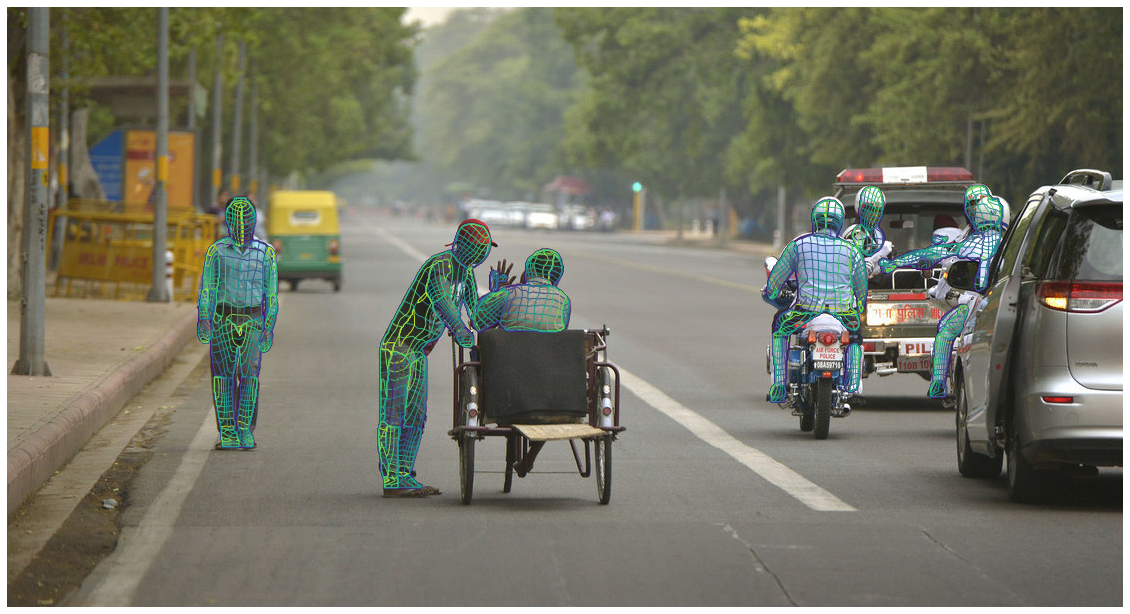

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

im  = cv2.imread(join(project_name, 'DensePoseData/demo_data/demo_im.jpg'))
IUV = cv2.imread(join(project_name, 'DensePoseData/infer_out/demo_im_IUV.png'))
INDS = cv2.imread(join(project_name, 'DensePoseData/infer_out/demo_im_INDS.png'),  0)

fig = plt.figure(figsize=[20, 20])
plt.imshow( im[:,:,::-1] )
plt.contour( IUV[:,:,1]/256.,10, linewidths = 1 )
plt.contour( IUV[:,:,2]/256.,10, linewidths = 1 )
plt.axis('off') ; plt.show()

### Prepare customized dataset
Please prepare the dataset according to the format described shown [here](https://github.com/NVlabs/imaginaire/blob/master/projects/fs_vid2vid/README.md#training)



In [ ]:
#### Get Library to preprocess data
!git clone https://github.com/NVlabs/few-shot-vid2vid.git

Cloning into 'few-shot-vid2vid'...
remote: Enumerating objects: 368, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 368 (delta 44), reused 63 (delta 32), pack-reused 272
Receiving objects: 100% (368/368), 61.23 MiB | 14.28 MiB/s, done.
Resolving deltas: 100% (165/165), done.


In [ ]:
import os
import requests
from urllib import request
### Select driver video sequence
vid_url = 'https://www.dropbox.com/s/4a1ksuun93b02kz/driver.mp4?dl=1'
# change url to dl=1 


### Select reference image
ref_url = 'https://www.dropbox.com/s/ga8jcxhpglnyv0o/woman_1.jpg?dl=1'


### Download dataset locally
sample_path = '/content/demo_dataset/'
if not os.path.exists(sample_path):
    os.makedirs(sample_path)
ref_save_path =  '/content/demo_dataset/ref.jpg'
vid_save_path = '/content/demo_dataset/driver.mp4'
request.urlretrieve(ref_url, ref_save_path) # save pic locally
request.urlretrieve(vid_url, vid_save_path )


### Define paths
PATH_TO_DATA = '/content/demo_dataset/'
if not os.path.exists(PATH_TO_DATA):
    os.mkdir(PATH_TO_DATA)
ref_img = str(ref_save_path) # define local path to ref image
driver_vid = str(vid_save_path) # define local path to driver video sequence

### Define DensePose & OpenPose paths
openpose_path = '/content/drive/MyDrive/openpose/'
densepose_path = '/content/drive/MyDrive/DensePose/'
output_path = '/content/drive/MyDrive/test'

In [ ]:
print(os.getcwd())

/content/drive/MyDrive


In [ ]:
%cd drive/MyDrive

/content/drive/MyDrive


In [ ]:
import sys
preprocess_path = 'content/drive/MyDrive/few-shot-vid2vid/'
sys.path.append(preprocess_path)
sys.path.append('content/drive/MyDrive/few-shot-vid2vid/data/preprocess/')

In [ ]:
!chmod u+x /content/drive/MyDrive/openpose/build/examples/openpose/openpose.bin

In [ ]:
### Check if output path exists
if not os.path.exists(output_path):
    os.mkdir(output_path)

### Get video frames & keypoints

!python3 few-shot-vid2vid/data/preprocess/preprocess.py --video_root /content/demo_dataset/ \
--openpose_root=/content/openpose/ --densepose_root=/content/drive/MyDrive/DensePose/ \
                        --output_root ./drive/MyDrive/test


### Get keypoints

/content/demo_dataset//*.mp4
  0% 0/1 [00:00<?, ?it/s]Extracted 61 frames
Extract all frames from driver video
Extracting keyframes.
Starting OpenPose demo...
Configuring OpenPose...
Starting thread(s)...

Error:
Cuda check failed (100 vs. 0): no CUDA-capable device is detected

Coming from:
- /content/openpose/src/openpose/gpu/cuda.cpp:getCudaGpuNumber():48
- /content/openpose/src/openpose/gpu/cuda.cpp:cudaCheck():37
- /content/openpose/src/openpose/gpu/cuda.cpp:getCudaGpuNumber():58
- /content/openpose/src/openpose/gpu/gpu.cpp:getGpuNumber():27
- /content/openpose/include/openpose/wrapper/wrapperAuxiliary.hpp:configureThreadManager():1221
- /content/openpose/include/openpose/wrapper/wrapper.hpp:exec():424
  0% 0/1 [00:04<?, ?it/s]
Traceback (most recent call last):
  File "/content/drive/MyDrive/few-shot-vid2vid/data/preprocess/util/get_poses.py", line 43, in run_openpose
    extract_valid_frames(args, video_path, img_dir)
  File "/content/drive/MyDrive/few-shot-vid2vid/data/preproce

In [ ]:
'''
### Upload video and convert to appropriate frames and LMDB keypoint format
### Training/Testing format preparation
url_to_data = 'https://www.dropbox.com/sh/04k0ni8e0pd8t68/AADh8NHYCsjpH_5GW8exbLewa?dl=1'
save_zip_folder = '/content/imaginaire/projects/fs_vid2vid/fs_vid2vid_demo.zip'
request.urlretrieve(url_to_data, save_zip_folder)

train = "train"
val = "val"
!python scripts/build_lmdb.py \
--config configs/projects/fs_vid2vid/face_forensics/ampO1.yaml \
--data_root [PATH_TO_DATA]  \
--output_root datasets/face_forensics/lmdb/[train | val] --paire
'''

In [ ]:
# @markdown ### Or just download [demo dataset](https://www.dropbox.com/sh/04k0ni8e0pd8t68/AADh8NHYCsjpH_5GW8exbLewa?dl=0)
dataset_url = 'https://www.dropbox.com/sh/04k0ni8e0pd8t68/AADh8NHYCsjpH_5GW8exbLewa?dl=0'

### To train and test the model on the provided [demo dataset](https://www.dropbox.com/sh/04k0ni8e0pd8t68/AADh8NHYCsjpH_5GW8exbLewa?dl=0), simply run: